## <font color=black>Assignment 2: XOR & Multiplication NN Implementation</font>
### <font color=black>Jarred van de Voort</font>

#### <font color=black>Instructions: </font>
1) The first case to study is the well known XOR example. For this example, the hidden
layer maybe simply made of two units, N = 2, and the input and target output are
binary values.
There are only four different possible inputs/outputs scenarios, Thus, for the training set,
validation set and generalization set, for each step τ we only have these four examples.
Show the plots we described in visualization, show the final generalization loss, show
all the weights of the network (list them). How to show the final generalization output
? we should be able to run your forward code, with the final weights, and your generalization
set, and produce your final outputs.

2) The second example we ask you to run the multiplication function. The inputs are
x1, x2 and they are real values. Well, let us restrict to multiplications of integers ? The
target output should be t = x1 × x2 also an integer number. Note that it should work
on negative numbers as well, i.e., x1, x2, t ∈ Z. We may restrict further to x1, x2, t ∈
(−M, M), say M=100. It is easy to generate a large test set, not so large validation set,
and an even larger generalization set. Say D = 1, 000, V = 200 and G = 4, 000. Of
course, make sure to include cases of multiplication by zero and by 1.
In this case, the hidden layer should be "large" to have a chance to work. Consider
N = 20 (I am not sure it will work!). Display the same plots and values as the XOR
problem and we should be able to run your forward code, with the final weights, and
produce your final output.

#### <font color=black>Note: </font>
In the assignment, its specified that the network sjould multiply integers from -100 to 100. However, I've found that reLu has trouble with negative values, so I've opted to implement sigmoid activation. Likewise, I've decided to restrict values to 0,1 for simplicity & to demonstrate the capabilities of a trained NN. 



In [1]:
import matplotlib.pyplot as plt
import numpy as np

### <font color=black>Activation Function: Sigmoid</font>
The sigmoid function is an activation function that converts linear outputs to nonlinear outputs bounding the output between 0 & 1. We can also compute the gradient by taking the derivative of the sigmoid function which is useful for calculating error. I've found that using the sigmoid function is much easier to implement than the ReLu activation fuction, and appears to work well with both the XOR training set and multiplication training set. 

In [2]:
def sigmoid(net_input):
    return 1/(1+np.exp(-net_input))

def sigmoid_grad(net_input):
    s = sigmoid(net_input)
    return s*(1-s)

### <font color=black>Performing Forward Propagation</font>
The function provides a way for the neural network to propogate through the network & compute the output of every layer with the given inputs and weights and do a forward pass to the next layer.

In [3]:
def forward_propagate(training_inputs,theta_1,theta_2):
    
    #We first add a set of biases to the input of the first layer
    l1_input = np.c_[np.ones(training_inputs.shape[0]),training_inputs]#mxn+1
    
    #The input of the first layer is multiplied by the weights of the first layer
    l1_output = l1_input.dot(theta_1)
    
    #To get the input of the second layer, we pass the output of the first layer through an activation function and factor in biases 
    l2_input = np.c_[np.ones(training_inputs.shape[0]),sigmoid(l1_output)]
    
    #The input of the second layer is multiplied by the weights
    l2_output = l2_input.dot(theta_2)
    
    #The output is passed through the activation function to obtain the final probability
    l3_output = sigmoid(l2_output)
    
    return l1_input,l1_output,l2_input,l2_output,l3_output

### <font color=black>Performing Backpropagation</font>
For each iteration/epoch, we compute the error of each layer and update the weights as to minimize error

In [4]:
def back_propagate(training_inputs, training_outputs, theta_1, theta_2, learning_rate, show_detailed):
    
    l1_input, l1_output, l2_input, l2_output, pred = forward_propagate(training_inputs, theta_1, theta_2)
    
    #Error is computed as the difference between the predicted output and actual output
    del_2 = training_outputs - pred
    error = (np.sum(np.absolute(del_2))) #To get a sense of how well the NN is performing we can plot error for each iter

    #The error of the previous layer is found by computing the dot product of the error of the previous layer and the weights of the second layer
    del_1=del_2.dot(theta_2[1:,:].T)
    delta2 = del_2
            
    #The error of the first layer is multiplied by the sigmoid gradient of the output of the first layer
    delta1 = del_1*sigmoid_grad(l1_output)
        
    #The parameters are updated using gradient descent
    theta_1 += learning_rate * l1_input.T.dot(delta1)
    theta_2 += learning_rate * l2_input.T.dot(delta2)
    
    #Displays detailed info for each layer's weights at each step
    if show_detailed == True:
        print("-----------------")
        print("### Layer 1 ###\n")
        print("Updated Weights:")
        print(theta_1)
        print()
        print("Updated Loss: ")
        print(delta1)
        print()
        
        
        print("-----------------")
        print("### Layer 2 ###\n")
        print("Updated Weights:")
        print(theta_2)
        print()
        print("Updated Loss: ")
        print(delta2)
    
    return training_inputs, theta_1, theta_2, pred, error

### <font color=black>Plotting the Learning Curve</font>
Now that we have kept track of our error throughout each iteration, we can measure how well our NN has performed. Looks pretty good!

In [5]:
def plot_learning(error_set):
    print("----- Learning Curve -----")
    x = list(range(len(error_set)))
    plt.title("NN Training Error")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.plot(x, error_set, color = 'b')
    plt.show()

### <font color=black>Putting it all together</font>

Now that we have a neural network toolkit, we can now pass the network training training data to test our hypothesis and examine how efficiently the NN can make predictions. I've included two sample training sets, one set for each problem. This will also require us to initialize the weights for the network so that it can start training.

--- Epoch 0---

[[0.76172162]
 [0.7677612 ]
 [0.77031712]
 [0.77131503]]

--- Epoch 100---

[[0.13878529]
 [0.17356835]
 [0.18515116]
 [0.17692585]]

--- Epoch 200---

[[0.05483216]
 [0.18430813]
 [0.23967759]
 [0.19562144]]

--- Epoch 300---

[[0.02996469]
 [0.19817751]
 [0.27591442]
 [0.17316426]]

--- Epoch 400---

[[0.02297563]
 [0.20214769]
 [0.29052675]
 [0.16336753]]

--- Epoch 500---

[[0.02074043]
 [0.20217118]
 [0.2954716 ]
 [0.16117507]]

--- Epoch 600---

[[0.02003829]
 [0.20178926]
 [0.29734161]
 [0.1605706 ]]

--- Epoch 700---

[[0.01984042]
 [0.20145178]
 [0.29817535]
 [0.1603502 ]]

--- Epoch 800---

[[0.01980625]
 [0.20117926]
 [0.29862497]
 [0.16024999]]

--- Epoch 900---

[[0.01982143]
 [0.20095935]
 [0.29891442]
 [0.16019367]]

----- Learning Curve -----


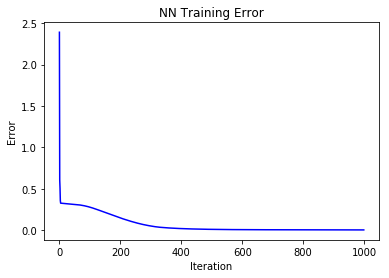

### Input ###
[[0.1 0.2]
 [0.4 0.5]
 [0.6 0.5]
 [0.8 0.2]]

### Expected Output ###
[[0.02]
 [0.2 ]
 [0.3 ]
 [0.16]]

### Predicted Output ###
[[0.01984812]
 [0.20078125]
 [0.2991249 ]
 [0.16015578]]


In [6]:
def main():
    """
    The first thing we must do is structure our neural network with the input data in mind,
    this includes number of layers, neurons, epochs etc.
    """   
    
    ex = 2 #Change this to 2 for problem 2: multiplication
    
    #Initializing input data sets for exercise 1 & exercise 2
    if(ex == 1): #Problem 1 training sets
        training_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
        training_outputs = np.array([[0,1,1,0]]).T
    
    else: #Problem 2 training sets
        #Since I've implemented the sigmoid activation function,I've found that input is limited to postive values
        training_inputs = np.array([[.1,.2],[.4,.5],[.6,.5],[.8,.2]])
        training_outputs = np.array([[.02,.20,.30,.16]]).T
    
    #Initializing attributes for NN structure 
    num_features = training_inputs.shape[1] #initializing number of features/input
    hidden_neurons = 2 #initialzing number of neurons in hidden layer
    epochs = 1000 #number of iterations
    learning_rate = 1 
    show_detailed = False #detailed output for each layer's weights
    error_set = []
    
    """
    Now that we've set up our neural network and structured our training data, we must initialize weights
    that the NN will use to start learning with backpropagation.  
    """
    
    theta_1 = (np.random.random((num_features + 1, hidden_neurons)))
    theta_2 = (np.random.random((hidden_neurons + 1, 1)))
    
    for i in range(epochs):
        training_inputs, theta_1, theta_2, pred, error = back_propagate(training_inputs,training_outputs, theta_1, theta_2, learning_rate, show_detailed)
        error_set.append(error)
        if(i % 100 == 0):
            print("--- Epoch " + str(i) + "---\n")
            print(pred)
            print()
    
    l1_input, l1_output, l2_input, l2_output, pred = forward_propagate(training_inputs, theta_1, theta_2) #running forward propagation with the updated weights
    
    plot_learning(error_set)
    
    #displaying the predicted output of the model
    print("### Input ###")
    print(training_inputs)
     
    print("\n### Expected Output ###")
    print(training_outputs)
    
    print("\n### Predicted Output ###")
    print(pred)

if __name__ == "__main__":
    main()